<html>
<head>
<style>
h1 {text-align: center;}
p {text-align: center;}
div {text-align: center;}
</style>
</head>
<body>

<h1>Breast Cancer Classification Using Machine Learning</h1>


</body>
</html>

## Importing Libraries

In [262]:
import kaggle
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score

## Data Collection

In [263]:
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data

Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
License(s): CC-BY-NC-SA-4.0
breast-cancer-wisconsin-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [264]:
with zipfile.ZipFile('breast-cancer-wisconsin-data.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [265]:
df = pd.read_csv('data.csv')

In [266]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Data Preprocessing

In [267]:
print(df.shape)

(569, 33)


In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [269]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [270]:
df.duplicated().sum()

0

In [271]:
print(df['diagnosis'].unique())

['M' 'B']


_Observations:_

* data set contains 569 rows and 33 columns
* there are only missing values in column Unnamed: 32 and all columns are null so we can drop it
* id column is not useful for our analysis so we can drop it
* the data set contains 32 features and 1 target variable
* There are no duplicate rows in the data set
* the target variable is categorical and contains 2 classes: M and B
* As Target variable is categorical so we need to encode it

#### Droping Unnamed: 32 and id columns

In [272]:
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

#### Checking weather the operation is successful or not

In [273]:
print(df.shape)

(569, 31)


In [274]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## Exploratory Data Analysis

Text(0.5, 1.0, 'diagnosis Rate')

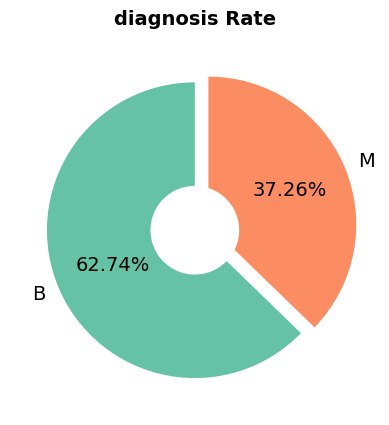

In [275]:
colors = sns.color_palette('Set2', len(df.diagnosis.value_counts()))
plt.pie(df.diagnosis.value_counts(), labels=["B","M"], autopct="%.2f%%", textprops={"size":14},
        colors = colors,explode=[0,0.1],startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("diagnosis Rate",fontweight="black",size=14 ,pad=15)


_Observations:_

* The data set is imbalanced as the number of Benign cases is more than the number of Malignant cases

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14924\1911535813.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=col, data=df, ax=ax[i], fill=True, lw=2, hue = 'diagnosis',color = "Green",shade = True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14924\1911535813.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=col, data=df, ax=ax[i], fill=True, lw=2, hue = 'diagnosis',color = "Green",shade = True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14924\1911535813.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=col, data=df, ax=ax[i], fill=True, lw=2, hue = 'diagnosis',color = "Green",shade = True)
C:\Users\Leno

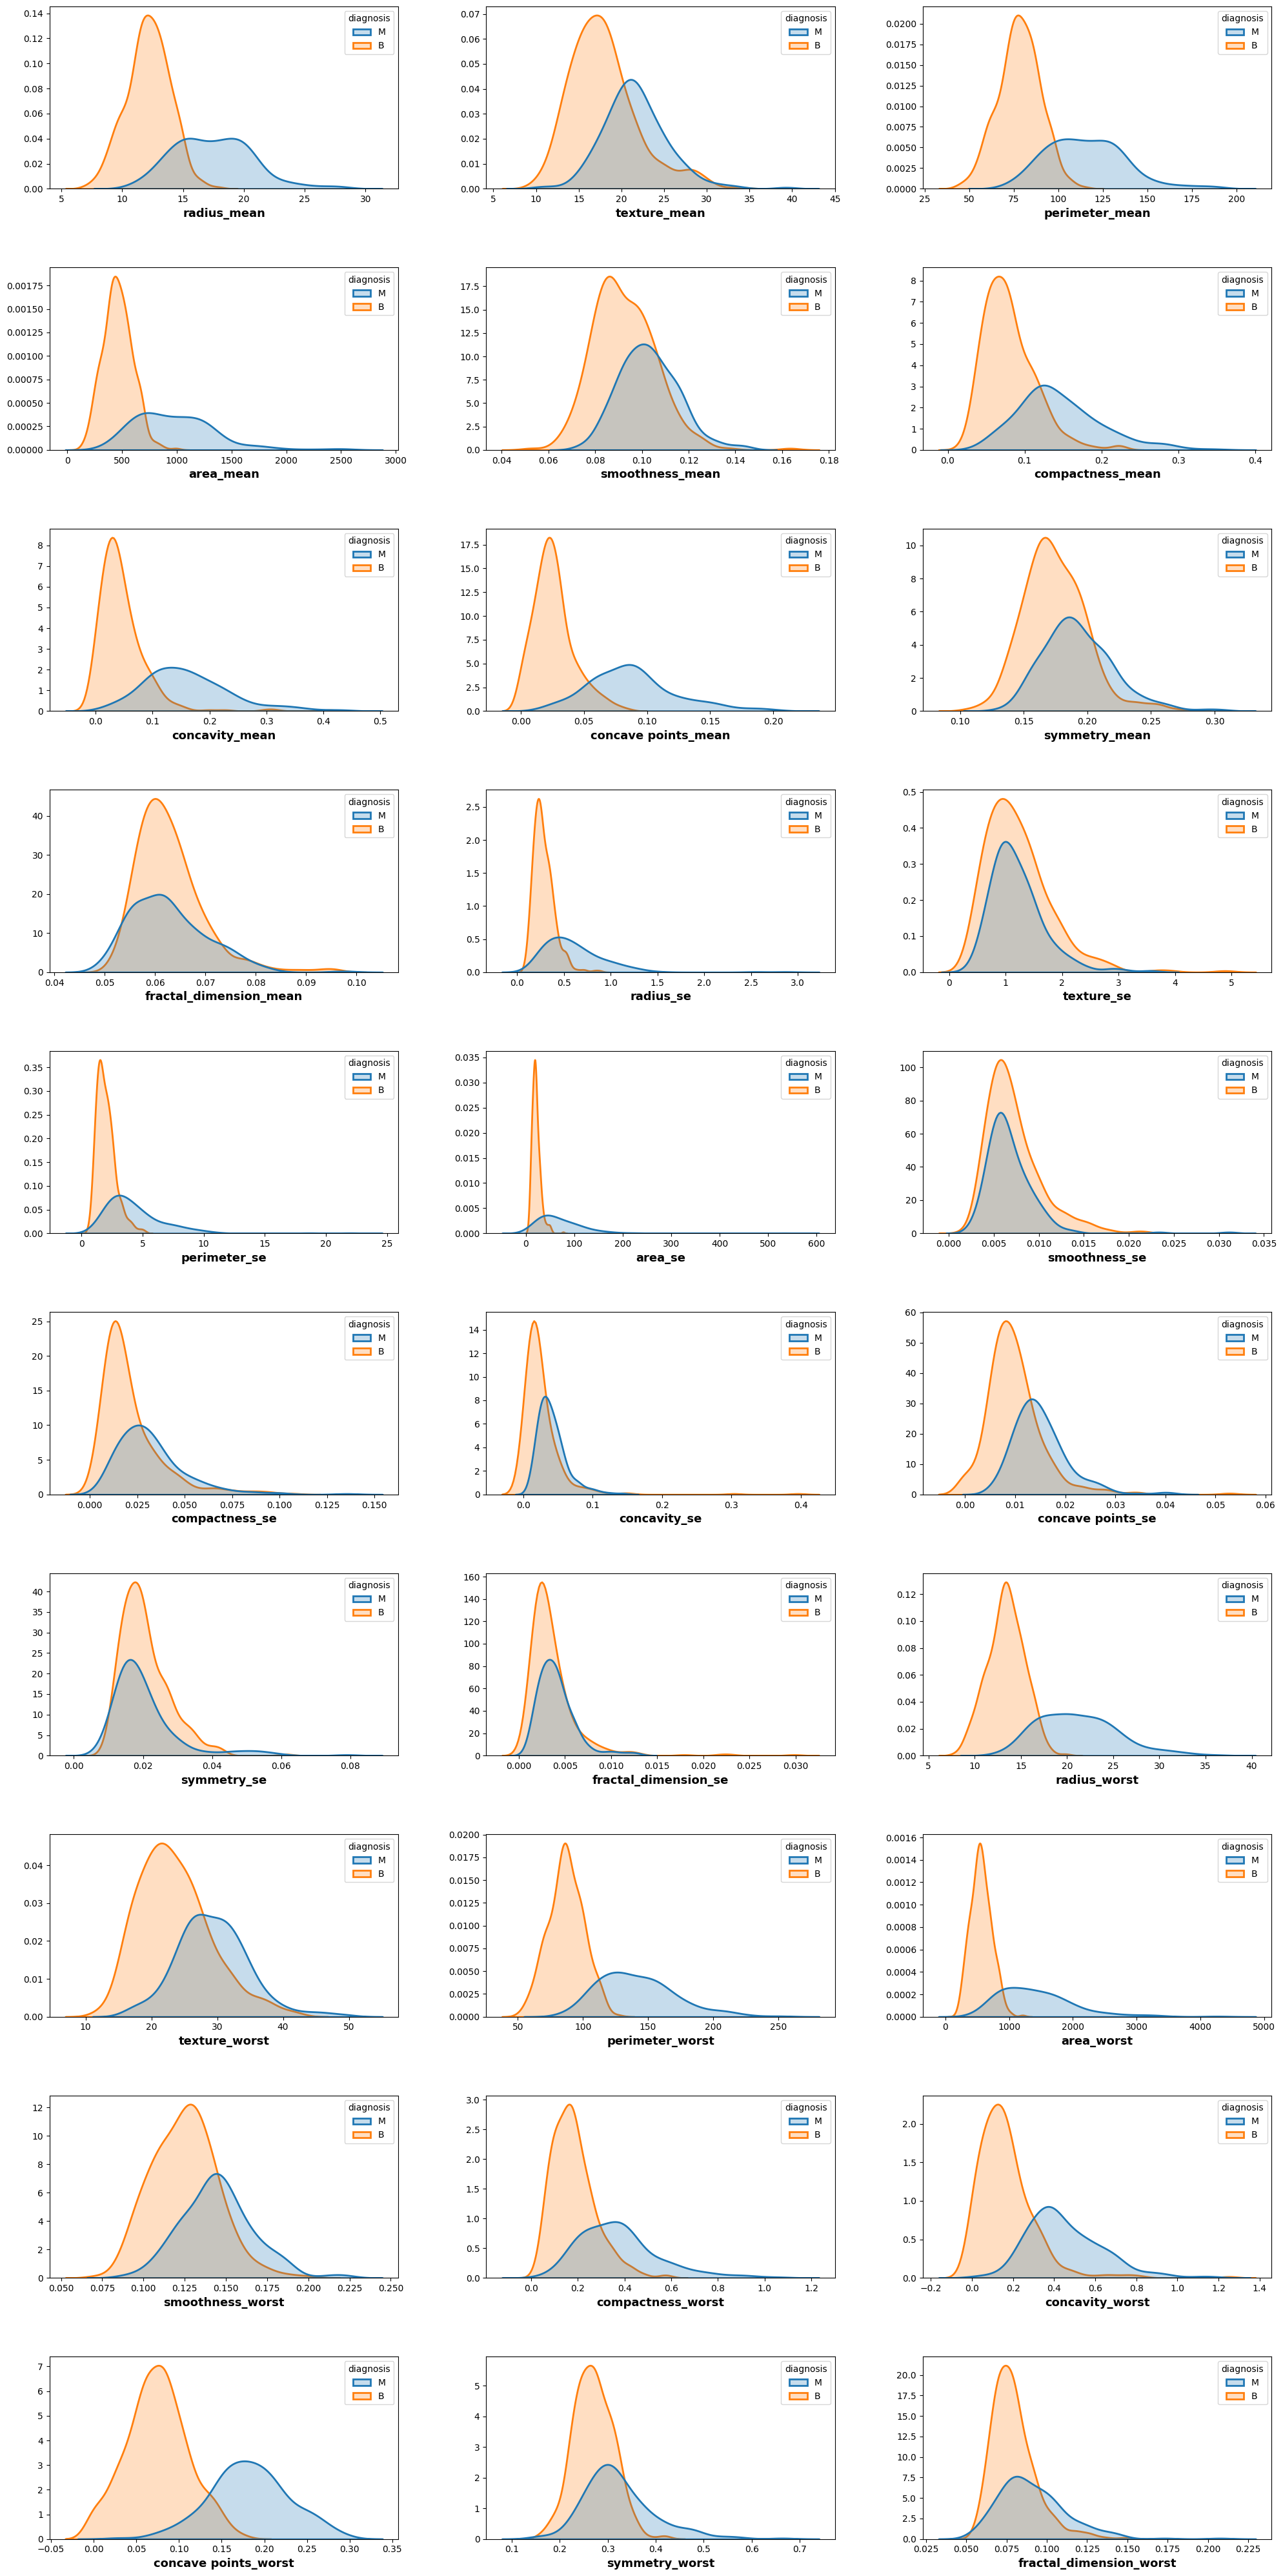

In [276]:
fig, ax = plt.subplots(10, 3, figsize=(20, 40))
ax = ax.flatten()

for i, col in enumerate(df.columns[1:]):
    sns.kdeplot(x=col, data=df, ax=ax[i], fill=True, lw=2, hue = 'diagnosis',color = "Green",shade = True)
    ax[i].set_xlabel(col, fontsize = 13, fontweight = 'bold')
    ax[i].set_ylabel('')
    
plt.tight_layout(w_pad=5, h_pad=5)
plt.show()

_Observations:_

* The figure suggests that higher values on the x-axis are linked to malignant tumors, while lower values correspond to benign tumors.

#### Checking for outliers

In [39]:
def count_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

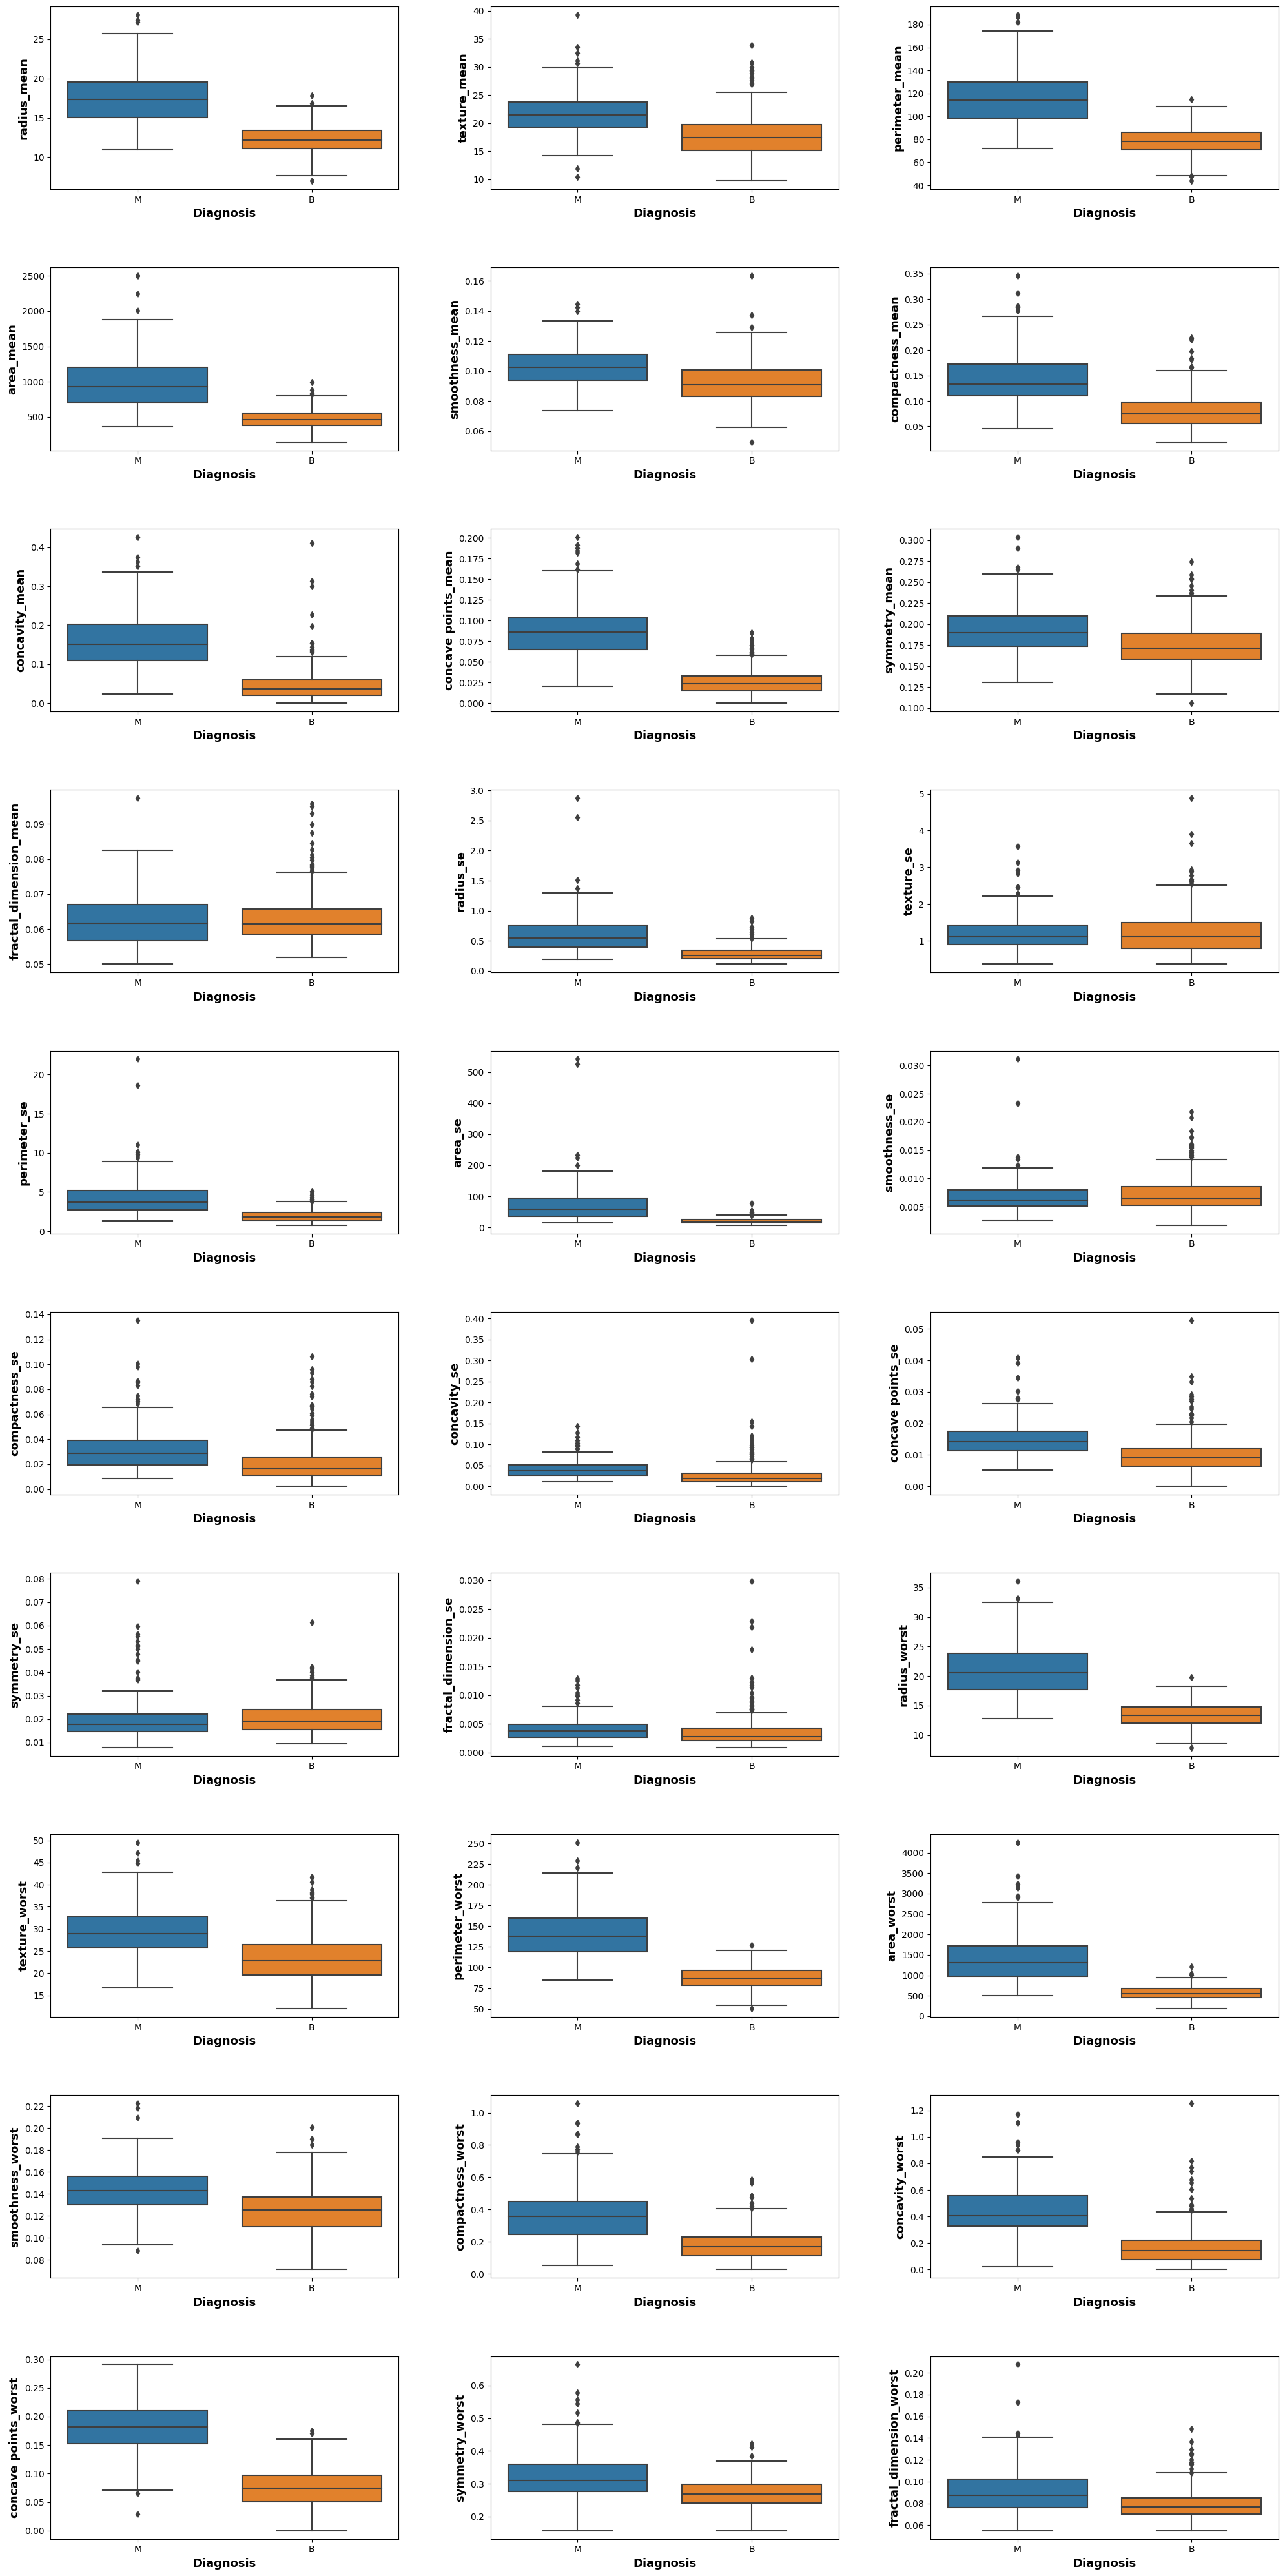

In [277]:
fig, ax = plt.subplots(10, 3, figsize=(20, 40))
ax = ax.flatten()
for i, col in enumerate(df.columns[1:]):
    sns.boxplot(x='diagnosis', y=col, data=df, ax=ax[i])
    ax[i].set_xlabel('Diagnosis', fontsize = 13, fontweight = 'bold')
    ax[i].set_ylabel(col, fontsize = 13, fontweight = 'bold')
plt.tight_layout(w_pad=5, h_pad=5)
plt.show()

## Splitting data

#### Saperating the target variable

In [278]:
x=df.drop('diagnosis', axis=1)
y=df['diagnosis']

#### Splitting into Training and testing data

In [279]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [280]:
print(x.shape,x_train.shape, x_test.shape)

(569, 30) (455, 30) (114, 30)


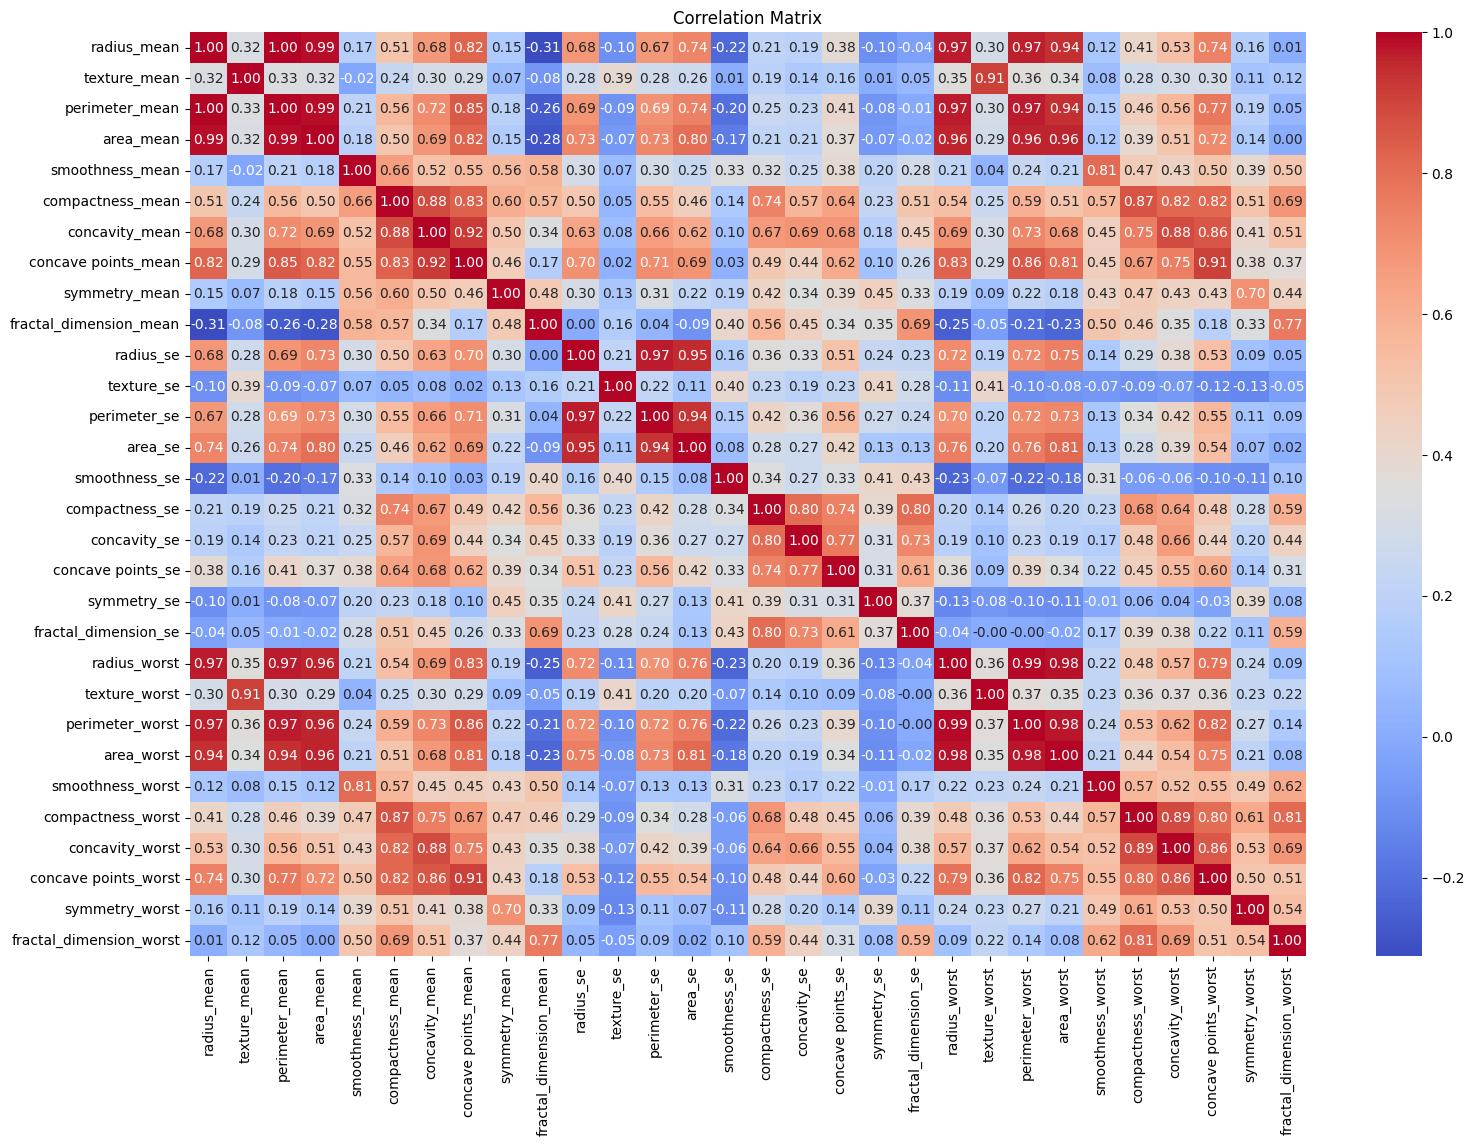

In [281]:
plt.figure(figsize=(18, 12))
sns.heatmap(x.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Encoding

In [282]:
le = LabelEncoder()
y = le.fit_transform(y)

## Scaling

In [283]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Model Building

#### regressions

In [284]:
model_lr = LogisticRegression()
model_knn = KNeighborsClassifier()
model_svm = SVC(probability=True)
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier()
model_nb = GaussianNB()

##### Model Training 

In [285]:
model_lr.fit(x_train_scaled, y_train)
model_knn.fit(x_train_scaled, y_train)
model_svm.fit(x_train_scaled, y_train)
model_dt.fit(x_train_scaled, y_train)
model_rf.fit(x_train_scaled, y_train)
model_nb.fit(x_train_scaled, y_train)

GaussianNB()

## Model Evaluation

#### Confusion Matrix

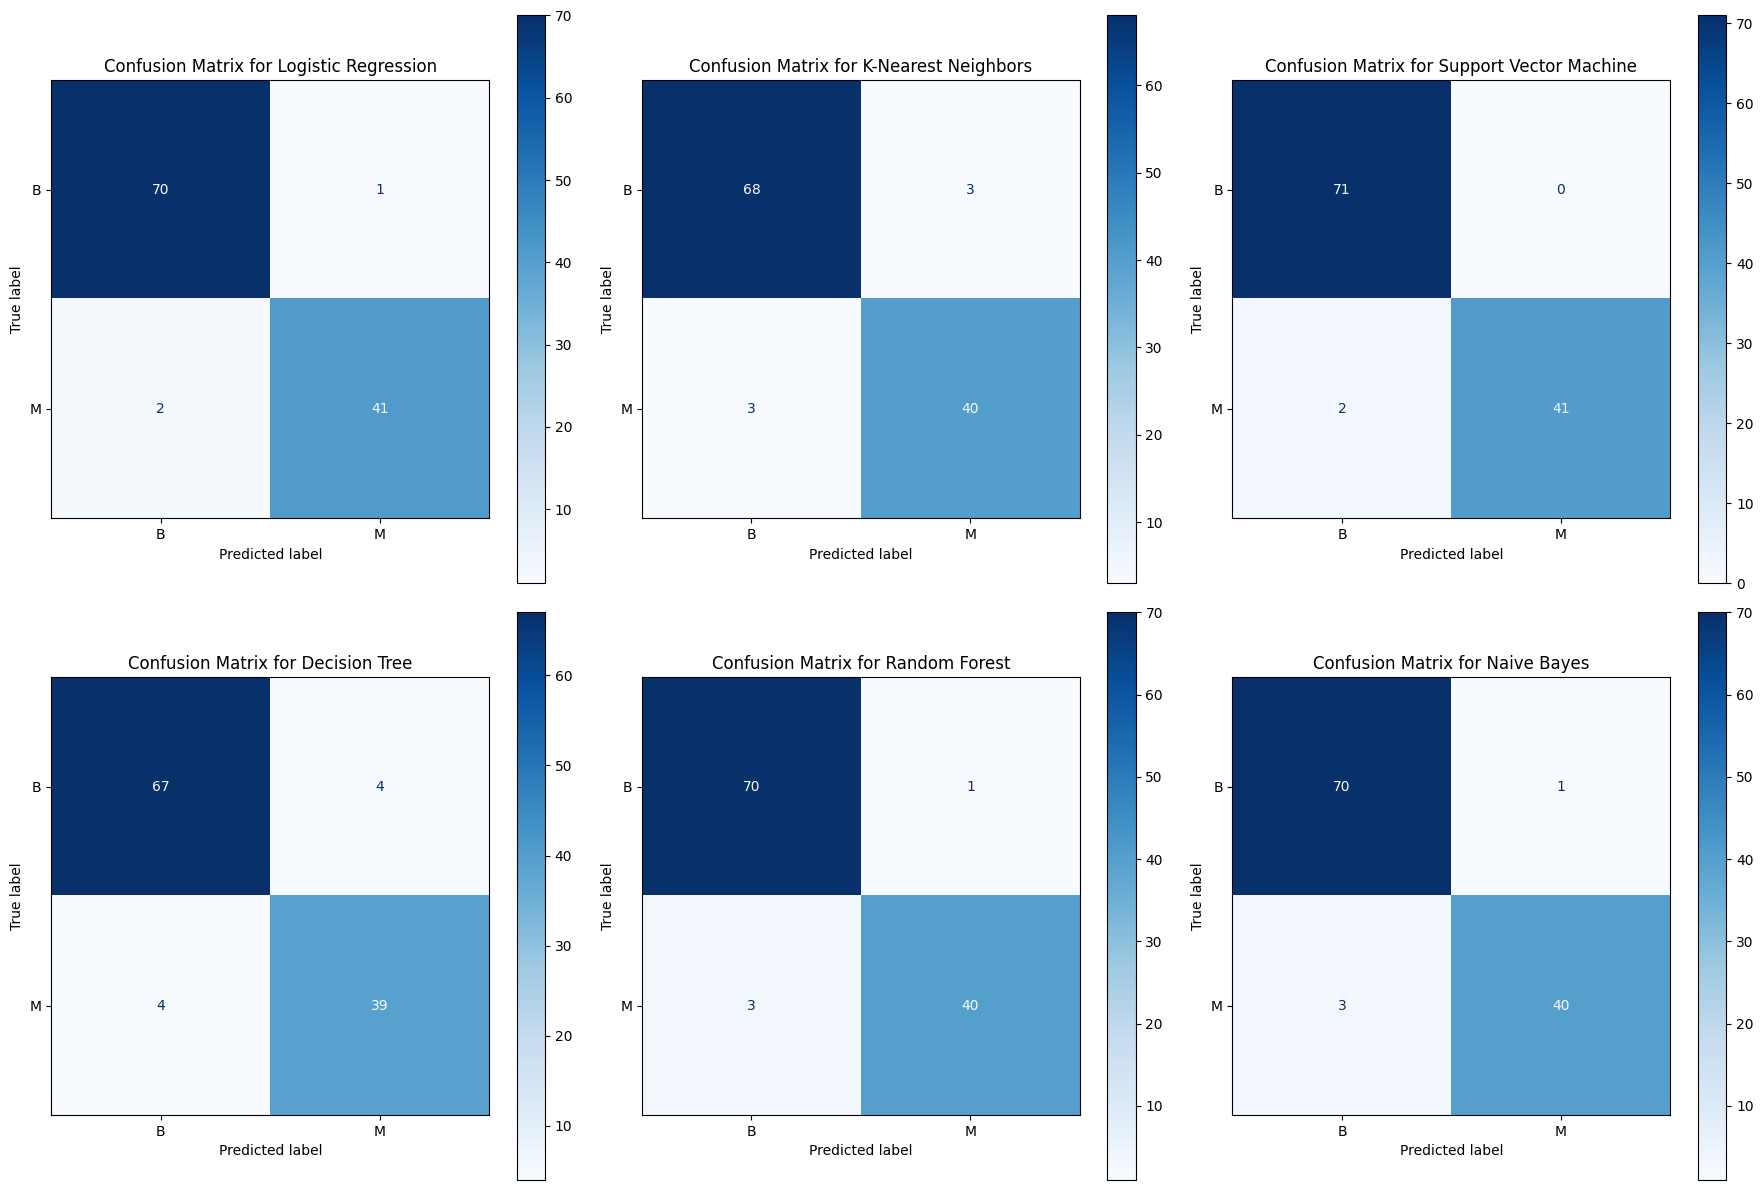

In [286]:

models = [model_lr, model_knn, model_svm, model_dt, model_rf, model_nb]
model_names = ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine', 'Decision Tree', 'Random Forest', 'Naive Bayes']
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()
for ax, model, name in zip(axes, models, model_names):
    y_pred = model.predict(x_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['B', 'M'])
    disp.plot(cmap=plt.cm.Blues, ax=ax)
    ax.set_title(f'Confusion Matrix for {name}')
plt.tight_layout()
plt.show()

#### Accuracy

In [287]:
for model, name in zip(models, model_names):
    y_pred = model.predict(x_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='M')
    recall = recall_score(y_test, y_pred, pos_label='M')
    f1 = f1_score(y_test, y_pred, pos_label='M')
    
    print(f'{name}:')
    print(f'  Accuracy: {accuracy:.2f}')
    print(f'  Precision: {precision:.2f}')
    print(f'  Recall: {recall:.2f}')
    print(f'  F1-Score: {f1:.2f}')
    print()

Logistic Regression:
  Accuracy: 0.97
  Precision: 0.98
  Recall: 0.95
  F1-Score: 0.96

K-Nearest Neighbors:
  Accuracy: 0.95
  Precision: 0.93
  Recall: 0.93
  F1-Score: 0.93

Support Vector Machine:
  Accuracy: 0.98
  Precision: 1.00
  Recall: 0.95
  F1-Score: 0.98

Decision Tree:
  Accuracy: 0.93
  Precision: 0.91
  Recall: 0.91
  F1-Score: 0.91

Random Forest:
  Accuracy: 0.96
  Precision: 0.98
  Recall: 0.93
  F1-Score: 0.95

Naive Bayes:
  Accuracy: 0.96
  Precision: 0.98
  Recall: 0.93
  F1-Score: 0.95



#### ROC Curve

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14924\837600523.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14924\837600523.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14924\837600523.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14924\837600523.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14924\837600523.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


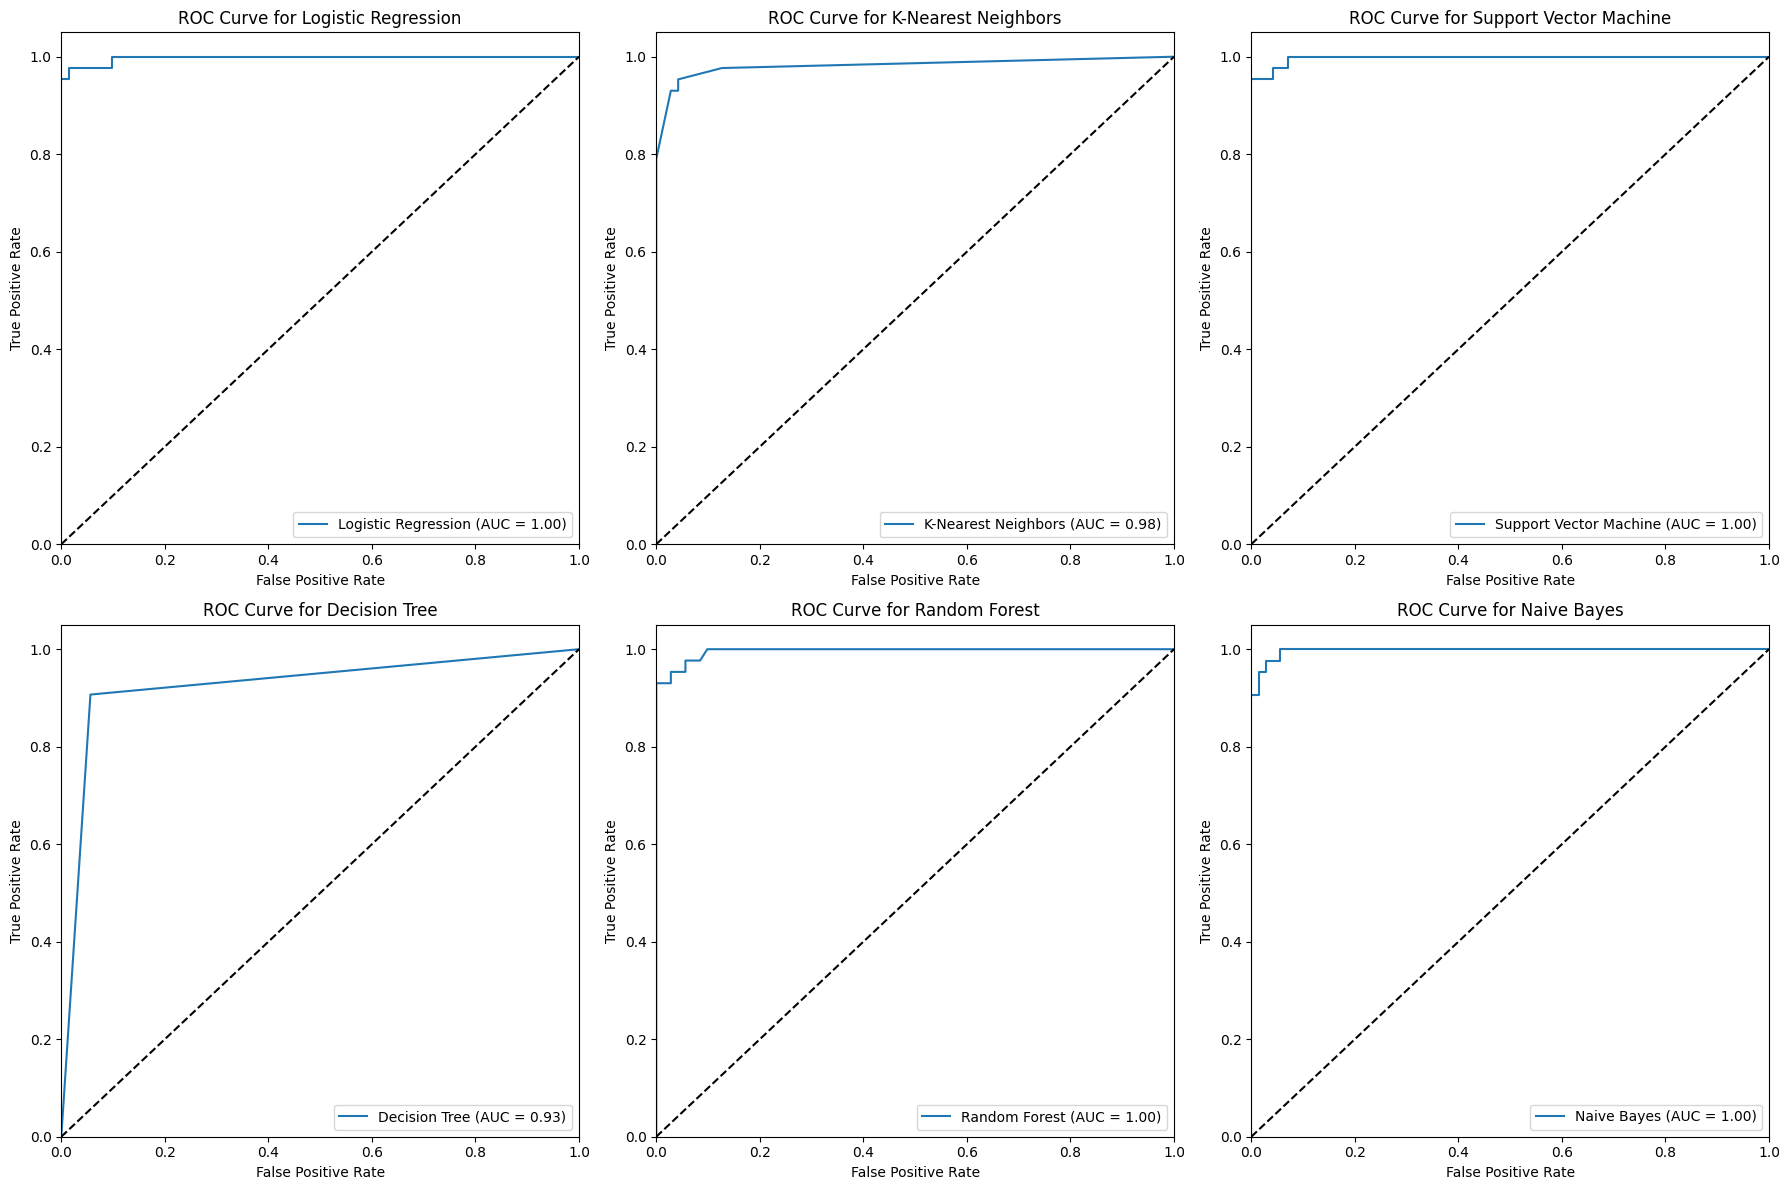

In [288]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for ax, model, name in zip(axes, models, model_names):
        y_pred_prob = model.predict_proba(x_test_scaled)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob, pos_label='M')
        auc = roc_auc_score(y_test, y_pred_prob)
        ax.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title(f'ROC Curve for {name}')
        ax.legend(loc='lower right')
        plt.tight_layout()
plt.show()

#### adding ada boost to all models

In [289]:
model_lr_ada = AdaBoostClassifier(base_estimator=model_lr, n_estimators=50, random_state=42)
model_knn_ada = AdaBoostClassifier(base_estimator=model_knn, n_estimators=50, random_state=42)
model_svm_ada = AdaBoostClassifier(base_estimator=model_svm, n_estimators=50, random_state=42)
model_dt_ada = AdaBoostClassifier(base_estimator=model_dt, n_estimators=50, random_state=42)
model_rf_ada = AdaBoostClassifier(base_estimator=model_rf, n_estimators=50, random_state=42)
model_nb_ada = AdaBoostClassifier(base_estimator=model_nb, n_estimators=50, random_state=42)

In [290]:
model_lr_ada.fit(x_train_scaled, y_train)
model_knn_ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
model_knn_ada.fit(x_train_scaled, y_train)
model_svm_ada.fit(x_train_scaled, y_train)
model_dt_ada.fit(x_train_scaled, y_train)
model_rf_ada.fit(x_train_scaled, y_train)
model_nb_ada.fit(x_train_scaled, y_train)

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site

AdaBoostClassifier(base_estimator=GaussianNB(), random_state=42)

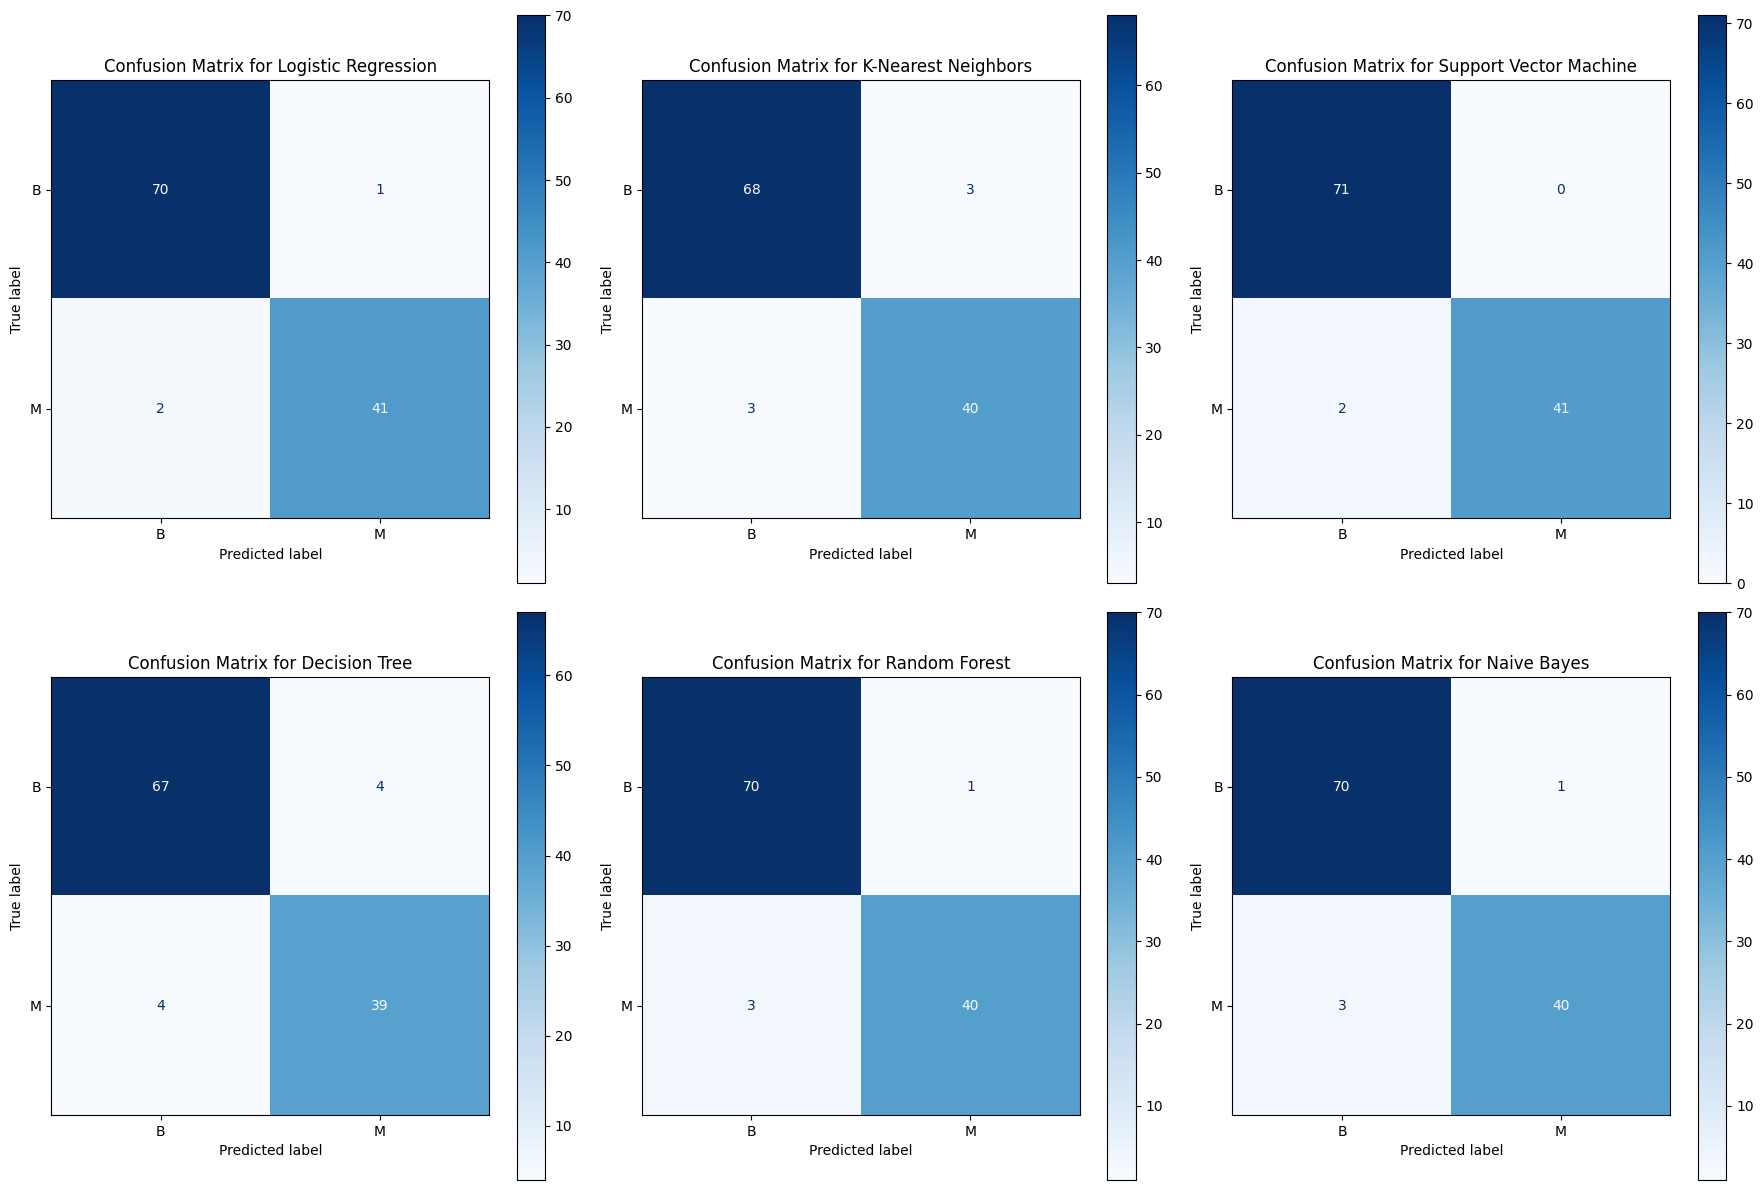

In [291]:
models_ada = [model_lr_ada, model_knn_ada, model_svm_ada, model_dt_ada, model_rf_ada, model_nb_ada]
model_names_ada = ['Logistic Regression_ada', 'K-Nearest Neighbors_ada', 'Support Vector Machine_ada', 'Decision Tree_ada', 'Random Forest_ada', 'Naive Bayes_ada']
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()
for ax, model, name in zip(axes, models, model_names):
    y_pred = model.predict(x_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['B', 'M'])
    disp.plot(cmap=plt.cm.Blues, ax=ax)
    ax.set_title(f'Confusion Matrix for {name}')
plt.tight_layout()
plt.show()

In [292]:
for model, name in zip(models_ada, model_names_ada):
    y_pred = model.predict(x_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='M')
    recall = recall_score(y_test, y_pred, pos_label='M')
    f1 = f1_score(y_test, y_pred, pos_label='M')
    
    print(f'{name}:')
    print(f'  Accuracy: {accuracy:.2f}')
    print(f'  Precision: {precision:.2f}')
    print(f'  Recall: {recall:.2f}')
    print(f'  F1-Score: {f1:.2f}')
    print()

Logistic Regression_ada:
  Accuracy: 0.98
  Precision: 0.98
  Recall: 0.98
  F1-Score: 0.98

K-Nearest Neighbors_ada:
  Accuracy: 0.94
  Precision: 0.93
  Recall: 0.91
  F1-Score: 0.92

Support Vector Machine_ada:
  Accuracy: 0.96
  Precision: 0.95
  Recall: 0.95
  F1-Score: 0.95

Decision Tree_ada:
  Accuracy: 0.94
  Precision: 0.93
  Recall: 0.91
  F1-Score: 0.92

Random Forest_ada:
  Accuracy: 0.96
  Precision: 0.98
  Recall: 0.93
  F1-Score: 0.95

Naive Bayes_ada:
  Accuracy: 0.93
  Precision: 1.00
  Recall: 0.81
  F1-Score: 0.90



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14924\4284793222.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14924\4284793222.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14924\4284793222.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14924\4284793222.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14924\4284793222.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


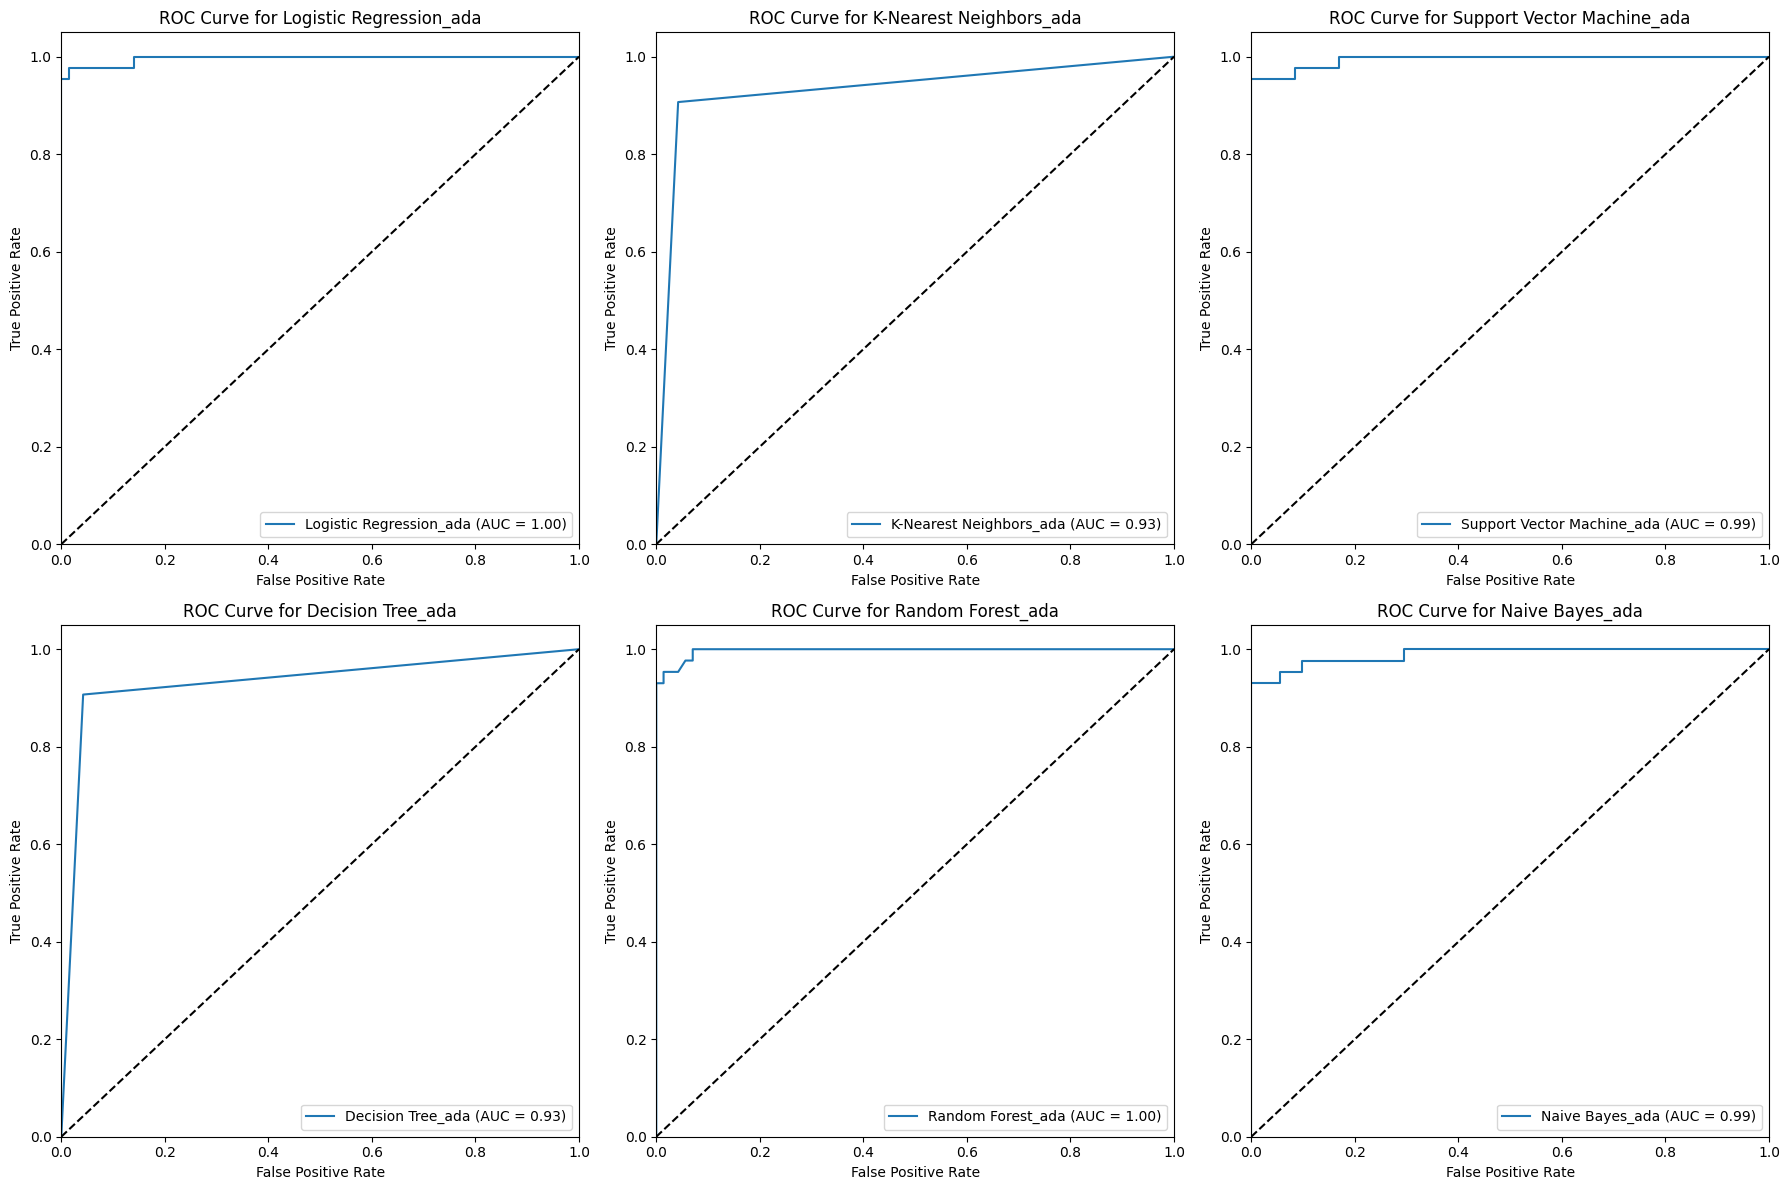

In [293]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for ax, model, name in zip(axes, models_ada, model_names_ada):
        y_pred_prob = model.predict_proba(x_test_scaled)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob, pos_label='M')
        auc = roc_auc_score(y_test, y_pred_prob)
        ax.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title(f'ROC Curve for {name}')
        ax.legend(loc='lower right')
        plt.tight_layout()
plt.show()

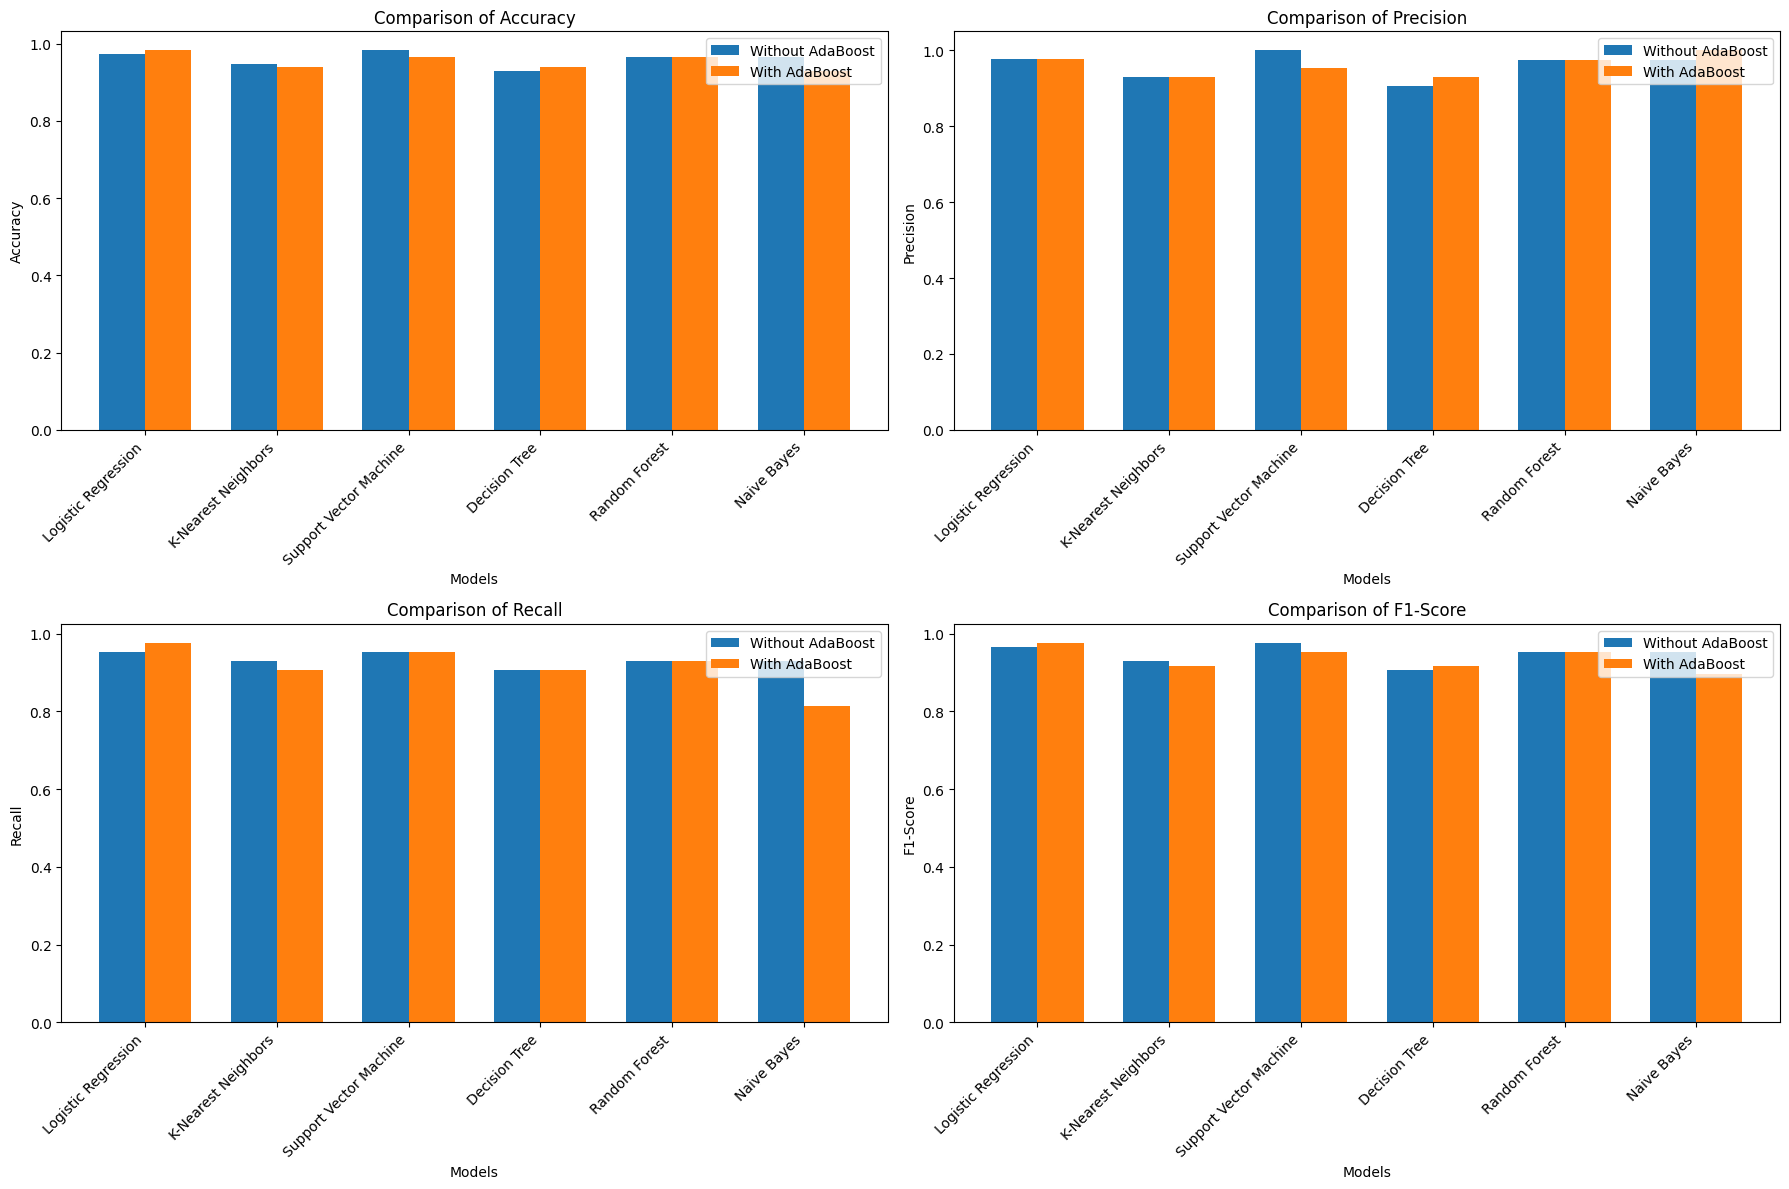

In [294]:
metrics = {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}
for model in models:
    y_pred = model.predict(x_test_scaled)
    metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['Precision'].append(precision_score(y_test, y_pred, pos_label='M'))
    metrics['Recall'].append(recall_score(y_test, y_pred, pos_label='M'))
    metrics['F1-Score'].append(f1_score(y_test, y_pred, pos_label='M'))
metrics_ada = {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}
for model in models_ada:
    y_pred = model.predict(x_test_scaled)
    metrics_ada['Accuracy'].append(accuracy_score(y_test, y_pred))
    metrics_ada['Precision'].append(precision_score(y_test, y_pred, pos_label='M'))
    metrics_ada['Recall'].append(recall_score(y_test, y_pred, pos_label='M'))
    metrics_ada['F1-Score'].append(f1_score(y_test, y_pred, pos_label='M'))
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

for ax, metric_name in zip(axes, metrics_names):
    index = np.arange(len(model_names))
    bar_width = 0.35
    bar1 = ax.bar(index, metrics[metric_name], bar_width, label='Without AdaBoost')
    bar2 = ax.bar(index + bar_width, metrics_ada[metric_name], bar_width, label='With AdaBoost')
    
    ax.set_xlabel('Models')
    ax.set_ylabel(metric_name)
    ax.set_title(f'Comparison of {metric_name}')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(model_names, rotation=45, ha='right')
    ax.legend()

plt.tight_layout()
plt.show()

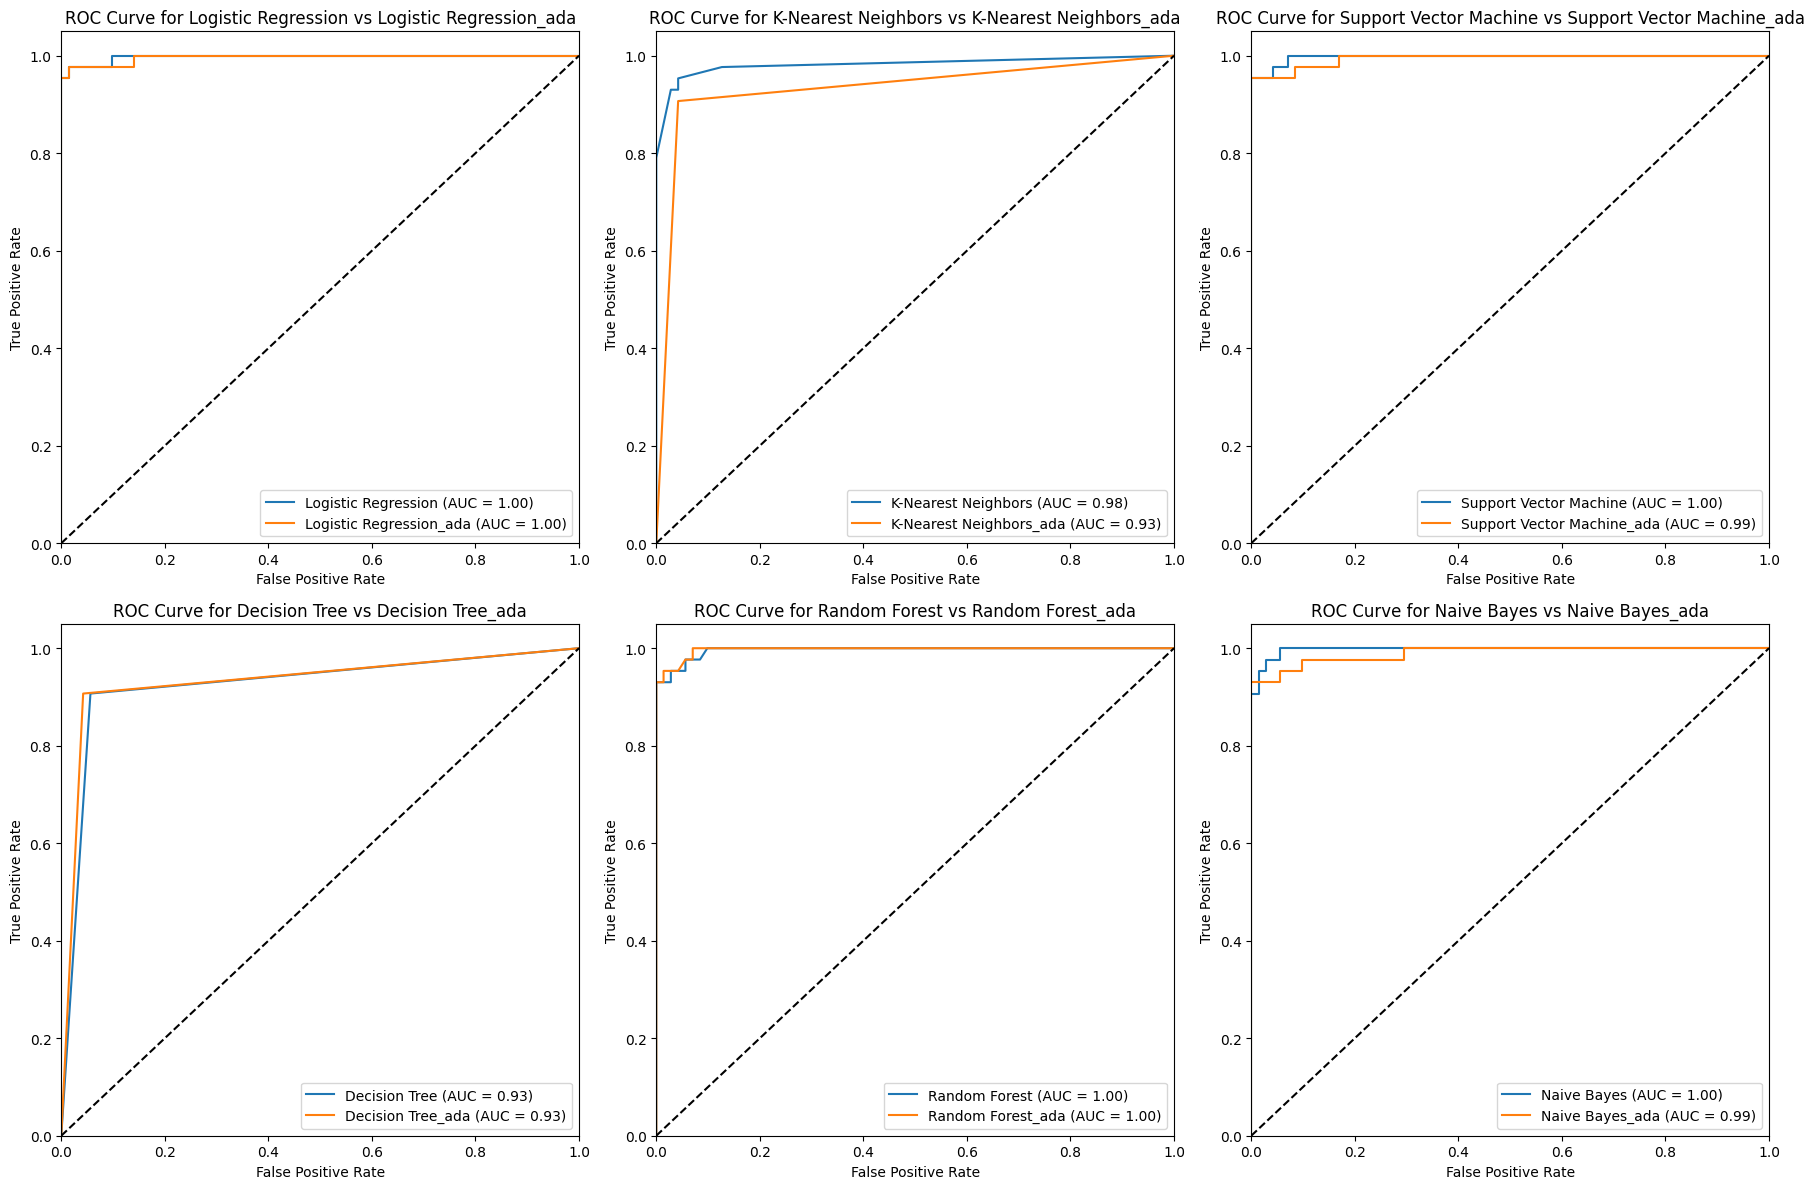

In [295]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for ax, model, model_ada, name, name_ada in zip(axes, models, models_ada, model_names, model_names_ada):
    y_pred_prob = model.predict_proba(x_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob, pos_label='M')
    auc = roc_auc_score(y_test, y_pred_prob)
    ax.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')
    
    y_pred_prob_ada = model_ada.predict_proba(x_test_scaled)[:, 1]
    fpr_ada, tpr_ada, _ = roc_curve(y_test, y_pred_prob_ada, pos_label='M')
    auc_ada = roc_auc_score(y_test, y_pred_prob_ada)
    ax.plot(fpr_ada, tpr_ada, label=f'{name_ada} (AUC = {auc_ada:.2f})')
    
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve for {name} vs {name_ada}')
    ax.legend(loc='lower right')

plt.tight_layout()
plt.show()

In [296]:
# Combine metrics for models with and without AdaBoost
all_metrics = {name: metrics for name, metrics in zip(model_names, zip(*metrics.values()))}
all_metrics_ada = {name: metrics for name, metrics in zip(model_names_ada, zip(*metrics_ada.values()))}

# Find the best model based on each metric
best_models = {}
for metric_name in metrics_names:
    best_model = max(all_metrics, key=lambda x: all_metrics[x][metrics_names.index(metric_name)])
    best_model_ada = max(all_metrics_ada, key=lambda x: all_metrics_ada[x][metrics_names.index(metric_name)])
    best_models[metric_name] = (best_model, all_metrics[best_model][metrics_names.index(metric_name)])
    best_models[f'{metric_name}_ada'] = (best_model_ada, all_metrics_ada[best_model_ada][metrics_names.index(metric_name)])

# Print the best models for each metric
for metric_name in metrics_names:
    print(f'Best model for {metric_name}: {best_models[metric_name][0]} with {metric_name} = {best_models[metric_name][1]:.2f}')
    print(f'Best model for {metric_name} with AdaBoost: {best_models[f"{metric_name}_ada"][0]} with {metric_name} = {best_models[f"{metric_name}_ada"][1]:.2f}')
    print()

Best model for Accuracy: Support Vector Machine with Accuracy = 0.98
Best model for Accuracy with AdaBoost: Logistic Regression_ada with Accuracy = 0.98

Best model for Precision: Support Vector Machine with Precision = 1.00
Best model for Precision with AdaBoost: Naive Bayes_ada with Precision = 1.00

Best model for Recall: Logistic Regression with Recall = 0.95
Best model for Recall with AdaBoost: Logistic Regression_ada with Recall = 0.98

Best model for F1-Score: Support Vector Machine with F1-Score = 0.98
Best model for F1-Score with AdaBoost: Logistic Regression_ada with F1-Score = 0.98



Based on the above results, we can conclude that the logistic regression with ada is the best model for this problem even before boosting.

In [303]:
y_pred_ada = model_lr_ada.predict(x_test_scaled)
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print(f'Accuracy of Logistic Regression with AdaBoost: {accuracy_ada:.2f}')

Accuracy of Logistic Regression with AdaBoost: 0.98
